<a href="https://colab.research.google.com/github/MK316/classtools/blob/main/svgling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# svgling sample

In [ ]:
%%capture
!pip install svgling

In [ ]:
import svgling
svgling.draw_tree(
    ("S", 
     ("NP", 
      ("D", "the"), ("N", "elephant")
      ), 
     ("VP", 
      ("V", "saw"), ("NP", 
                     ("D", "the"), ("N", "rhinoceros")
                     )
      )
     )
    )

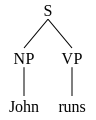

In [18]:
svgling.draw_tree(
    ("S", 
     ("NP", "John"), ("VP", "runs")
     )
)

In [19]:
import svgwrite

dwg = svgwrite.Drawing('test.svg', profile='tiny')
dwg.add(dwg.line((0, 0), (10, 0), stroke=svgwrite.rgb(10, 10, 16, '%')))
dwg.add(dwg.text('Test', insert=(0, 0.2), fill='red'))
dwg.save()

# Advanced

[svgling gallery](https://nbviewer.org/github/rawlins/svgling/blob/master/svgling%20Gallery.ipynb)

In [20]:
import svgling
from svgling.figure import Caption, SideBySide, RowByRow

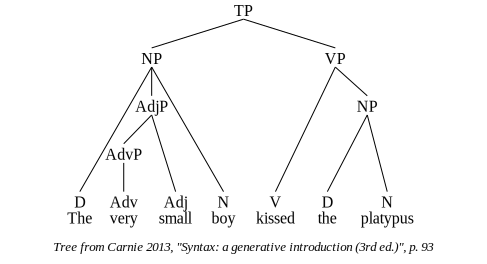

In [21]:
Caption(svgling.draw_tree("TP", ("NP", "D\nThe", ("AdjP", ("AdvP", "Adv\nvery"), "Adj\nsmall"), "N\nboy"), ("VP", "V\nkissed", ("NP", "D\nthe", "N\nplatypus")), leaf_nodes_align=True),
        "Tree from Carnie 2013, \"Syntax: a generative introduction (3rd ed.)\", p. 93")

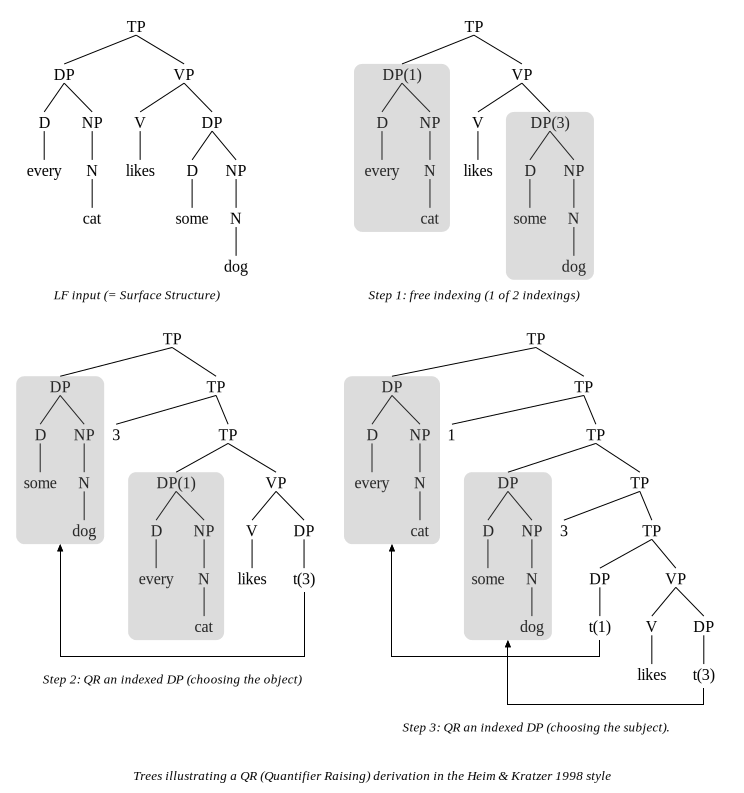

In [22]:
#@markdown Four sample trees with shadow box
qrtree0 = ("TP", ("DP", ("D", "every"), ("NP", ("N", "cat"))),
                                   ("VP", ("V", "likes"), ("DP", ("D", "some"), ("NP", ("N", "dog")))))
out0 = Caption(svgling.draw_tree(qrtree0), "LF input (= Surface Structure)")

qrtree1 = ("TP", ("DP(1)", ("D", "every"), ("NP", ("N", "cat"))),
                                   ("VP", ("V", "likes"), ("DP(3)", ("D", "some"), ("NP", ("N", "dog")))))
out1 = svgling.draw_tree(qrtree1)
out1.box_constituent((0,))
out1.box_constituent((1,1))
out1 = Caption(out1, "Step 1: free indexing (1 of 2 indexings)")

qrtree2 = ("TP", ("DP", ("D", "some"), ("NP", ("N", "dog"))),
                      ("TP", "3", ("TP", ("DP(1)", ("D", "every"), ("NP", ("N", "cat"))),
                                   ("VP", ("V", "likes"), ("DP", "t(3)")))))
out2 = svgling.draw_tree(qrtree2)
out2.movement_arrow((1,1,1,1), (0,))
out2.box_constituent((0,))
out2.box_constituent((1,1,0))
out2 = Caption(out2, "Step 2: QR an indexed DP (choosing the object)")

qrtree3 = ("TP", ("DP", ("D", "every"), ("NP", ("N", "cat"))),
           ("TP", "1", ("TP", ("DP", ("D", "some"), ("NP", ("N", "dog"))),
                     ("TP", "3", ("TP", ("DP", "t(1)"), ("VP", ("V", "likes"), ("DP", "t(3)")))))))
out3 = svgling.draw_tree(qrtree3)
out3.movement_arrow((1,1,1,1,0), (0,))
out3.box_constituent((0,))
out3.movement_arrow((1,1,1,1,1,1), (1,1,0))
out3.box_constituent((1,1,0))
out3 = Caption(out3, "Step 3: QR an indexed DP (choosing the subject).")

Caption(RowByRow(SideBySide(out0, out1), SideBySide(out2,out3)), "Trees illustrating a QR (Quantifier Raising) derivation in the Heim & Kratzer 1998 style")

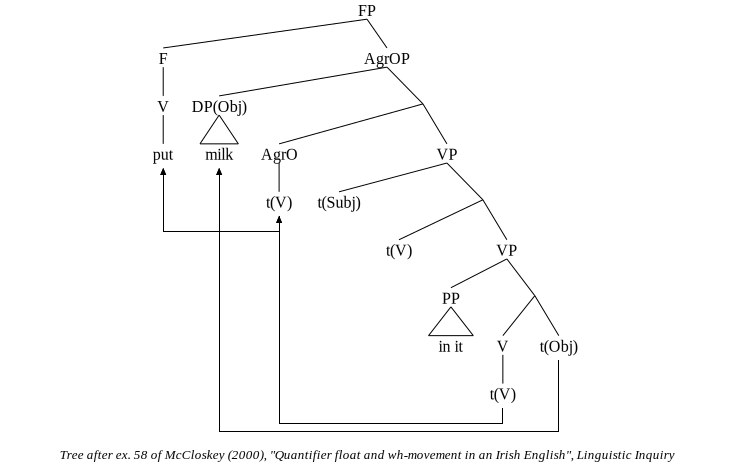

In [23]:
import imp
imp.reload(svgling.core)
mccloskey = ("FP", ("F", ("V", "put")),
             ("AgrOP", ("DP(Obj)", "milk"),
              ("", ("AgrO", "t(V)"),
               ("VP", "t(Subj)", ("", "t(V)",
                                  ("VP", ("PP", "in it"), ("", ("V", "t(V)"), "t(Obj)")))))))

# TODO: the example in the paper actually uses even horizontal spacing across the whole tree, can I simulate this?
out = svgling.draw_tree(mccloskey)
out.set_edge_style((1,0,0), svgling.core.TriangleEdge())
out.set_edge_style((1,1,1,1,1,0,0), svgling.core.TriangleEdge())
out.movement_arrow((1,1,1,1,1,1,0,0), (1,1,0,0))
out.movement_arrow((1,1,0,0), (0,0,0))
out.movement_arrow((1,1,1,1,1,1,1), (1,0))
Caption(out, "Tree after ex. 58 of McCloskey (2000), \"Quantifier float and wh-movement in an Irish English\", Linguistic Inquiry")